### EDA

In [1]:
import pandas as pd

c = pd.read_csv('Car price.csv')
c.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [2]:
c.shape

(4340, 8)

In [3]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
c.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [5]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

l = LabelEncoder()

def le(x):
    c[x] = l.fit_transform(c[x])   

In [9]:
le('fuel')
le('seller_type')
le('transmission')
le('owner')
le('name')

In [10]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   name           4340 non-null   int64
 1   year           4340 non-null   int64
 2   selling_price  4340 non-null   int64
 3   km_driven      4340 non-null   int64
 4   fuel           4340 non-null   int64
 5   seller_type    4340 non-null   int64
 6   transmission   4340 non-null   int64
 7   owner          4340 non-null   int64
dtypes: int64(8)
memory usage: 271.4 KB


In [11]:
c.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775,2007,60000,70000,4,1,1,0
1,1041,2007,135000,50000,4,1,1,0
2,505,2012,600000,100000,1,1,1,0
3,118,2017,250000,46000,4,1,1,0
4,279,2014,450000,141000,1,1,1,2


### Data Visualization

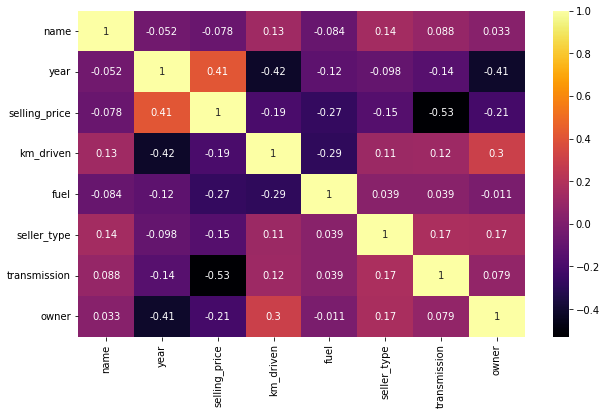

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(c.corr(), annot = True, cmap = 'inferno');

In [16]:
cc = c.corr()
abs(cc['selling_price']).sort_values(ascending = False)

selling_price    1.000000
transmission     0.530205
year             0.413922
fuel             0.269653
owner            0.207840
km_driven        0.192289
seller_type      0.151554
name             0.077598
Name: selling_price, dtype: float64

### Model

In [17]:
X = c.drop('selling_price', axis =  True)
y = c['selling_price']

In [18]:
from sklearn.model_selection import train_test_split

a, d, s, f = train_test_split(X, y, test_size = 0.2, random_state = 9)

In [19]:
print(a.shape)
print(s.shape)
print(d.shape)
print(f.shape)

(3472, 7)
(3472,)
(868, 7)
(868,)


In [23]:
from sklearn.ensemble import RandomForestClassifier

m = RandomForestClassifier()
m.fit(a, s)
g = m.predict(d)

In [24]:
from sklearn.metrics import r2_score

print('r2_score : ',r2_score(f,g))

r2_score :  0.6367465572589762
